In [1]:
include("myfuncs.jl")
using Main.MyFuncs
using CairoMakie

In [3]:
function spikeSeries(Vs::Vector{Float64})
    spikes::Vector{Union{Int64, Missing}} = [missing for i in 0:dt:T]
    spikes[vcat([(Vs[1:end-1] .< 0) .& (Vs[2:end] .> 0)]..., Bool(0))] .= 1
    return spikes
end

spikeSeries (generic function with 1 method)

In [2]:
N = 1000; dt = 0.01; T = 200;
N_hh = HH{Float64}(N=N, p = 0.001)
# Iexs = genIexs(N,0.05;dt=dt, iInterval=0.1, IMax=200)
Iexspre = genIexs(N, 10; dt=dt, iInterval=0.01, IMax=200, T=100);
Iexs = genIexs(1, 3; dt=dt, iInterval=0.01, IMax=200);

In [4]:
N_hh = HH{Float64}(N=N, p = 0.001)
Vs = Vector{Vector{Float64}}(undef, length([0:dt:T...]))
Vs2 = Vector{Vector{Float64}}(undef, length([0:dt:T...]))

for (i,t) in enumerate(0:dt:100)
    update!(N_hh, N_hh.param, Iexspre[i], dt; ḡC=0.00)
end


for (i,t) in enumerate(0:dt:T)
    update!(N_hh, N_hh.param, ones(N) * Iexs[i][1], dt; ḡC=.0)
    Vs[i] = N_hh.v[:]
end

N_hh = HH{Float64}(N=N, p = 0.001)
for (i,t) in enumerate(0:dt:100)
    update!(N_hh, N_hh.param, Iexspre[i], dt; ḡC=0.00)
end


for (i,t) in enumerate(0:dt:T)
    update!(N_hh, N_hh.param, ones(N) * Iexs[i][1], dt; ḡC=.33)
    Vs2[i] = N_hh.v[:]
end

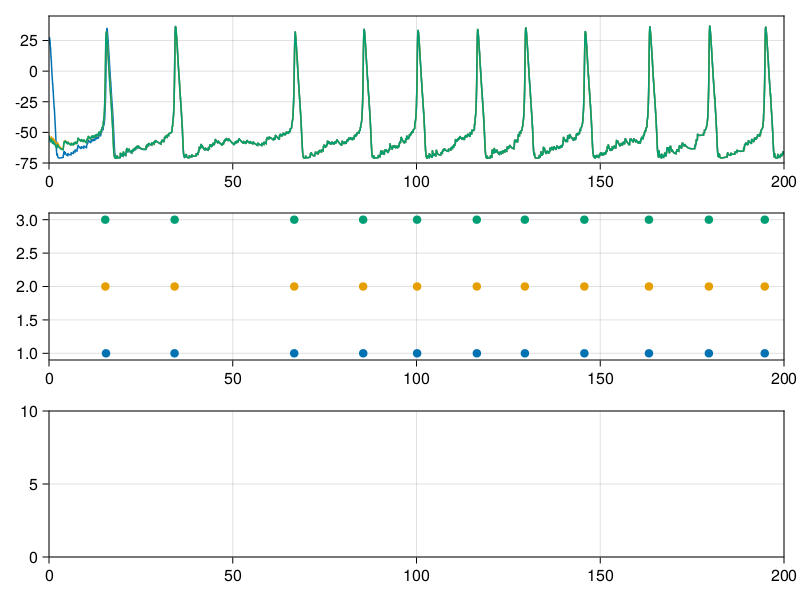

In [7]:
VsMat = hcat(Vs...);
IexsMat = hcat(Iexs...);

fig = Figure()
ax1 = Axis(fig[1,1])
ax2 = Axis(fig[2,1])
ax3 = Axis(fig[3,1])
lines!(ax1, [0:dt:T...],VsMat[3,:])
for row in eachrow(VsMat[N_hh.neighbors[3],:])
    lines!(ax1, [0:dt:T...],row)
end
ylims!(ax1, -75, 45)
# lines!(ax3, [0:dt:T...],IexsMat[3,:])
# for row in eachrow(IexsMat[N_hh.neighbors[3],:])
#     lines!(ax3, [0:dt:T...],row)
# end
scatter!(ax2, [0:dt:T...], spikeSeries(VsMat[3,:]))
for (i,row2) in enumerate(eachrow(VsMat[N_hh.neighbors[3],:]))
    # println(i)
    scatter!(ax2, [0:dt:T...], (i+1) .* spikeSeries(Vector{Float64}(row2)))
end
xlims!.([ax1,ax2,ax3], 0, T)
fig

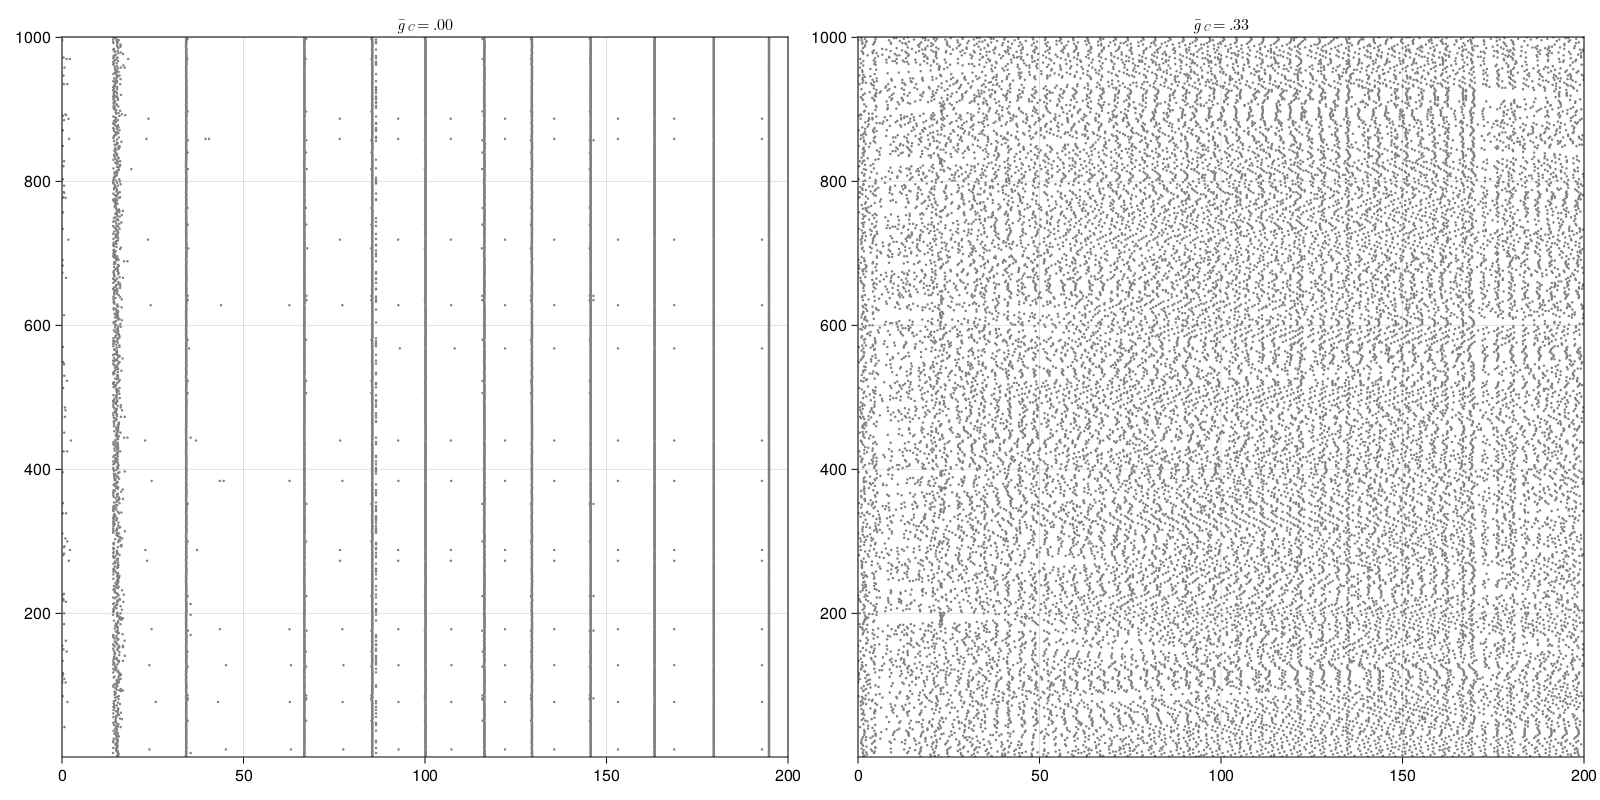

In [9]:
f2 = Figure(resolution=2 .*(800,400))
ax22 = Axis(f2[1,1],
    title=L"\bar{g}_{C} = .00"
)
ax23 = Axis(
    f2[1,2],
    title=L"\bar{g}_{C} = .33"
    )

for (i,row) in enumerate(eachrow(VsMat))
    # println(i)
    scatter!(ax22, [0:dt:T...], (i) .* spikeSeries(Vector{Float64}(row)),markersize=3.5, color=:gray)
end
for (i,row) in enumerate(eachrow(hcat(Vs2...)))
    # println(i)
    scatter!(ax23, [0:dt:T...], (i) .* spikeSeries(Vector{Float64}(row)),markersize=3.5, color=:gray)
end
xlims!.([ax22,ax23], 0, T)
ylims!.([ax22, ax23], 0.5, 1000.5)
f2

In [11]:
save("f2.png", f2)

CairoMakie.Screen{IMAGE}


In [4]:
VsMat[N_hh.neighbors[3],:]

2×20001 Matrix{Float64}:
 -59.7188  -59.7179  -59.717  -59.7161  …  -56.0477  -56.0185  -55.9894
 -59.7188  -59.7179  -59.717  -59.7161     -63.2253  -63.2004  -63.1756

In [47]:
spikeSeries(VsMat[3,:])

20001-element Vector{Union{Missing, Int64}}:
 missing
 missing
 missing
 missing
 missing
 missing
 missing
 missing
 missing
 missing
 ⋮
 missing
 missing
 missing
 missing
 missing
 missing
 missing
 missing
 missing

In [40]:
spikes2[4445]

1

7-element view(::Vector{Union{Missing, Int64}}, [1144, 4445, 8186, 11615, 13716, 16990, 19715]) with eltype Union{Missing, Int64}:
 1
 1
 1
 1
 1
 1
 1

In [4]:
sum((hcat(Vs...)[5,1:end-1] .< 0) .& (hcat(Vs...)[5,2:end] .> 0)) ./200

0.035

In [1]:
Threads.nthreads()

20